In [9]:
from src.models.conjugate_bayes_lin_reg import FlatPriorLinearRegression
import numpy as np
import torch
import matplotlib.pyplot as plt

ValueError: 'y1' is not 1-dimensional

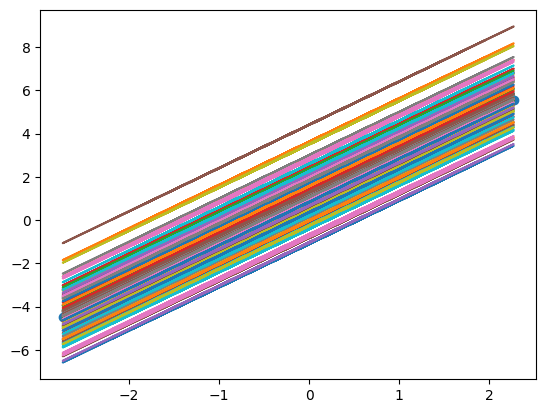

In [23]:
n = 100
p = 1

# Create design matrix and response
X = np.random.randn(n, p)
X = np.hstack((np.ones((n, 1)), X))
beta = np.array([1.0, 2.0]).reshape(-1, 1)
sigma = 1.0
y = X @ beta + np.random.randn(n) * sigma

# Fit the model
model = FlatPriorLinearRegression()
data = {'X': torch.tensor(X, dtype=torch.float32), 'y': torch.tensor(y, dtype=torch.float32)}
model.fit(data)

# Predict
X_test = np.random.randn(100, p)
X_test = np.hstack((np.ones((100, 1)), X_test))
y_test = X_test @ beta
predictive_dist = model.get_predictive_distribution(torch.tensor(X_test, dtype=torch.float32))
samples = predictive_dist.sample((100,))

# Get the mean and variances of the predictive distribution
mean = predictive_dist.mean
variance = predictive_dist.variance 

# Plot test data, true regression line, predictive mean and 95% probability interval
plt.scatter(X_test[:, 1], y_test, label='True data')
plt.plot(X_test[:, 1], mean, label='Predictive mean')
plt.fill_between(X_test[:, 1], mean - 1.96 * variance, mean + 1.96 * variance, alpha=0.3, label='95% PI')
plt.legend()
plt.show()


In [18]:
X.shape

(100, 3)